In [10]:
path =  '/mnt/data/zhujun/dataset/Youtube/'
from PIL import Image
import os
import numpy as np
import sys
sys.path.append('../')
import matplotlib.pyplot as plt

from benchmarking.video import YoutubeVideo
from benchmarking.utils.model_utils import eval_single_image
from benchmarking.utils.utils import interpolation, compute_f1


In [11]:
import glob
def load_vigil_result(path):
    vigil_perf = {}
    for file in glob.glob(path + 'results/vigil_e2e_result*.csv'):
        if 'with_videosize' not in file:
            continue
        print(file)
        with open(file, 'r') as f:
            firstline = f.readline()
#             print(firstline)
            for line in f:
                line_list = line.strip().split(',')
                key = line_list[0]
                bw = float(line_list[1])
                f1 = float(line_list[2])
                video_bw = float(line_list[3])
                vigil_perf[key] = (bw, f1, video_bw)
    return vigil_perf

In [12]:
vigil_perf = load_vigil_result('./vigil/')


./vigil/results/vigil_e2e_result_motorway_with_videosize.csv
./vigil/results/vigil_e2e_result_nyc_with_videosize.csv
./vigil/results/vigil_e2e_result_cropped_crossroad4_2_with_videosize.csv
./vigil/results/vigil_e2e_result_driving2_with_videosize.csv
./vigil/results/vigil_e2e_result_crossroad_with_videosize.csv
./vigil/results/vigil_e2e_result_driving_downtown_with_videosize.csv
./vigil/results/vigil_e2e_result_park_with_videosize.csv
./vigil/results/vigil_e2e_result_crossroad2_with_videosize.csv
./vigil/results/vigil_e2e_result_jp_with_videosize.csv
./vigil/results/vigil_e2e_result_crossroad2_night_with_videosize.csv
./vigil/results/vigil_e2e_result_lane_split_with_videosize.csv
./vigil/results/vigil_e2e_result_russia_with_videosize.csv
./vigil/results/vigil_e2e_result_tw_under_bridge_with_videosize.csv
./vigil/results/vigil_e2e_result_driving1_with_videosize.csv
./vigil/results/vigil_e2e_result_crossroad3_with_videosize.csv
./vigil/results/vigil_e2e_result_drift_with_videosize.csv
./

In [13]:
# def load_noscope_result(path):
#     noscope_perf = {}
#     for file in glob.glob(path + 'Noscope_e2e*.csv'):
#         if 'with_frame_diff' not in file:
#             continue
#         print(file)
#         if file == './noscope/Noscope_e2e_result_crossroad2_night_with_frame_diff.csv':
#             continue
#         if file == './noscope/Noscope_e2e_result_drift_with_frame_diff.csv':
#             continue
#         if file == './noscope/Noscope_e2e_result_driving2_with_frame_diff.csv':
#             continue
#         with open(file, 'r') as f:
#             f.readline()
#             for line in f:
#                 line_list = line.strip().split(',')
#                 key = line_list[0]
#                 bw = float(line_list[3])
#                 f1 = float(line_list[2])
#                 noscope_perf[key] = (bw, f1)                
#     return noscope_perf

def load_noscope_result(path):
    # only profile on first segment
    noscope_perf = {}
    file = './noscope/Noscope_e2e_result_with_frame_diff_allvideo_profile_once_0.75.csv'
    with open(file, 'r') as f:
        f.readline()
        for line in f:
            line_list = line.strip().split(',')
            key = line_list[0]
            bw = float(line_list[4])
            f1 = float(line_list[3])
            noscope_perf[key] = (bw, f1)                
    return noscope_perf


In [14]:
noscope_perf = load_noscope_result('./noscope/')

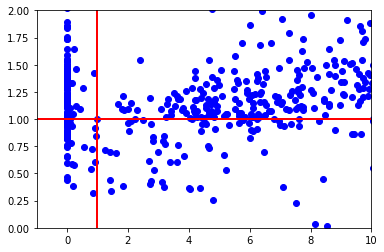

In [20]:

fig,ax = plt.subplots(1)

for key in noscope_perf.keys():
    if key not in vigil_perf:
        print('{} missing'.format(key))
        continue
    if vigil_perf[key][1] == 0 or vigil_perf[key][0] == 0:
        continue
    relative_f1 = noscope_perf[key][1]/vigil_perf[key][1]
    relative_bw = noscope_perf[key][0]/vigil_perf[key][2]

#     if noscope_perf[key][1] == 0 or noscope_perf[key][0] == 0:
#         continue
#     relative_f1 = vigil_perf[key][1]/noscope_perf[key][1]
#     relative_bw = vigil_perf[key][0]/noscope_perf[key][0]

#     if relative_f1 > 1 and relative_bw < 1:
#         print(key, vigil_perf[key], noscope_perf[key])
    if 'cropped' in key:
        continue
    ax.scatter(relative_bw, relative_f1, c='b')
    ax.axhline(y=1, color='r', linestyle='-')
    ax.axvline(x=1, color='r', linestyle='-')
    ax.set_xlim(-1,10)
    ax.set_ylim(0,2)

crossroad2_0 (8.746307036645753, 0.9697435109814161, 0.9283333333333333) (7.554093270951467, 0.9438272570802692, 0.8016666666666666) (8.31898895381011, 0.6125021291091807, 0.7792803087471163)
crossroad2_1 (7.841570026487705, 0.9582683982683984, 0.7833333333333333) (6.864156480269425, 0.9444734551784161, 0.685) (8.870358659513142, 0.6867704280155642, 0.7047290694887443)
crossroad2_10 (7.733447976351374, 0.9748206498804333, 0.915) (6.824986305647928, 0.9441873915558125, 0.8066666666666666) (8.18300083604989, 0.7978904917015667, 0.8090005112391281)
crossroad2_11 (7.673817103499986, 0.9141914191419143, 0.5866666666666667) (4.687127661564386, 0.7378233512001864, 0.3566666666666667) (10.215776304619753, 0.7487095897853844, 0.6736539302661276)
crossroad2_12 (8.910660957901916, 0.9834361805781099, 0.8883333333333333) (7.173908578639857, 0.95998682693891, 0.715) (9.475142773531292, 0.5179882525697503, 0.7462483550102958)
crossroad2_13 (9.04451267111207, 0.9643371757925071, 0.8416666666666667) (

crossroad2_81 (7.490658387757333, 0.9426565242832066, 0.6883333333333334) (5.79569811538644, 0.8341287057122198, 0.5316666666666666) (8.34528461672238, 0.6593245227606461, 0.6681050274921105)
crossroad2_82 (5.653299250980859, 0.814050223386227, 0.31166666666666665) (1.3682026371361766, 0.5907042253521128, 0.075) (13.78745860013248, 0.6633145615446501, 0.6725840877309193)
crossroad2_83 (6.576471509079524, 0.8203259005145798, 0.4583333333333333) (4.669942015556625, 0.6210344164583734, 0.325) (10.68987054846334, 0.6600819079739823, 0.6564154791679486)
crossroad2_84 (6.247283102148675, 0.9287482089357822, 0.7083333333333334) (5.682728996471793, 0.8882012646307009, 0.6433333333333333) (7.970151165912638, 0.7030115830115831, 0.7097954820676387)
crossroad2_85 (7.838888759051688, 0.9361004915346806, 0.615) (4.43746417648599, 0.7660979636763896, 0.34833333333333333) (10.131821420946244, 0.7123053956067392, 0.668664134973296)
crossroad2_86 (4.74942535684705, 0.7346622798529128, 0.365) (3.2002748

Text(0, 0.5, 'Accuracy (F1)')

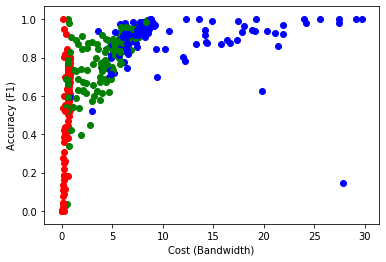

In [8]:
fig,ax = plt.subplots(1)
noscope_perf1 = {}

file1 = './noscope/Noscope_e2e_result_with_frame_diff_allvideo_profile_once.csv'
with open(file1, 'r') as f:
    f.readline()
    for line in f:
        line_list = line.strip().split(',')
        key = line_list[0]
        bw = float(line_list[4])
        f1 = float(line_list[3])
        trigger_frames = len(line_list[5].split(' '))
        noscope_perf1[key] = (bw, f1, trigger_frames/600.0)
#         ax.scatter(bw, f1, c='b')

noscope_perf2 = {}
file2 = './noscope/Noscope_e2e_result_with_frame_diff_allvideo_profile_once_0.75.csv'
with open(file2, 'r') as f:
    f.readline()
    for line in f:
        line_list = line.strip().split(',')
        key = line_list[0]
        bw = float(line_list[4])
        f1 = float(line_list[3])
        trigger_frames = len(line_list[5].split(' '))
        
        noscope_perf2[key] = (bw, f1,trigger_frames/600.0)
#         if key in noscope_perf:
            
#             ax.scatter(bw - noscope_perf[key][0], f1 - noscope_perf[key][1], c='r')
        
for key in sorted(noscope_perf1.keys()):
    if 'crossroad2' in key:
        ax.scatter(noscope_perf1[key][0], noscope_perf1[key][1], c='b', label='noscope_0.9')
        ax.scatter(noscope_perf2[key][0], noscope_perf2[key][1], c='g',label='noscope_0.75')
        ax.scatter(vigil_perf[key][2], vigil_perf[key][1], c='r', label='vigil')
        print(key, noscope_perf1[key], noscope_perf2[key], vigil_perf[key])

ax.set_xlabel('Cost (Bandwidth)')
ax.set_ylabel('Accuracy (F1)')
        
        